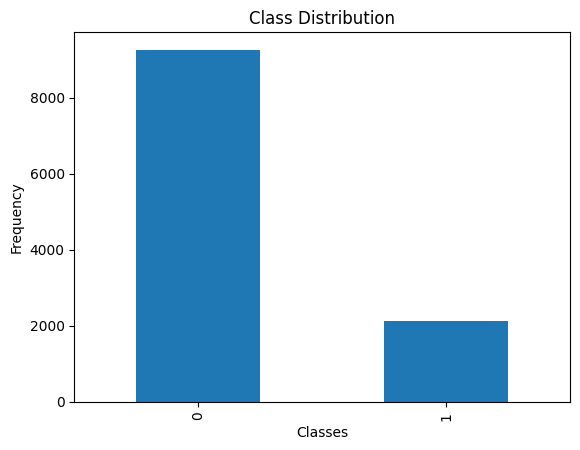

Class distribution:
 target
0    9256
1    2114
Name: count, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to check class distribution and identify imbalance
def check_class_imbalance(df, target_column):
    # Get class distribution
    class_counts = df[target_column].value_counts()
    
    # Plot class distribution
    class_counts.plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.show()
    
    # Print class distribution
    print("Class distribution:\n", class_counts)
    return class_counts

# Load the CSV file
df = pd.read_csv('tweetsv1.csv')

# Check for class imbalance in the 'target' column
class_counts = check_class_imbalance(df, 'target')


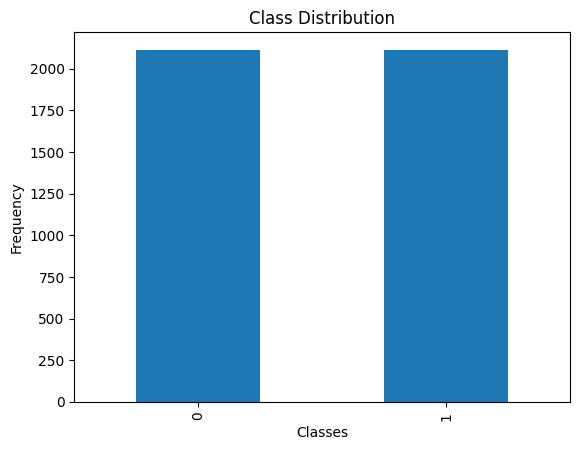

Class distribution:
 target
0    2114
1    2114
Name: count, dtype: int64


target
0    2114
1    2114
Name: count, dtype: int64

In [3]:
from sklearn.utils import resample

# Function to perform random undersampling
def random_undersampling(df, target_column):
    # Separate majority and minority classes
    majority_class = df[df[target_column] == df[target_column].value_counts().idxmax()]
    minority_class = df[df[target_column] == df[target_column].value_counts().idxmin()]
    
    # Perform undersampling of the majority class
    majority_undersampled = resample(majority_class, 
                                     replace=False,  # Sample without replacement
                                     n_samples=len(minority_class),  # Match minority class size
                                     random_state=42)  # Reproducibility
    
    # Combine minority class and undersampled majority class
    undersampled_df = pd.concat([majority_undersampled, minority_class])
    
    return undersampled_df

# Apply random undersampling to balance the dataset
undersampled_df = random_undersampling(df, 'target')

# Check class distribution after undersampling
check_class_imbalance(undersampled_df, 'target')


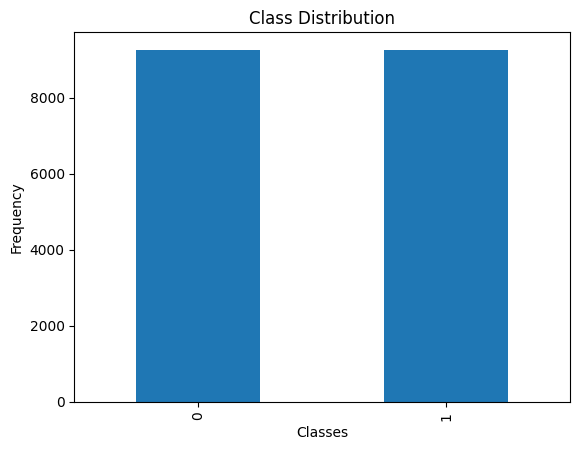

Class distribution:
 target
0    9256
1    9256
Name: count, dtype: int64


target
0    9256
1    9256
Name: count, dtype: int64

In [4]:
# Function to perform random oversampling
def random_oversampling(df, target_column):
    # Separate majority and minority classes
    majority_class = df[df[target_column] == df[target_column].value_counts().idxmax()]
    minority_class = df[df[target_column] == df[target_column].value_counts().idxmin()]
    
    # Perform oversampling of the minority class
    minority_oversampled = resample(minority_class, 
                                    replace=True,  # Sample with replacement
                                    n_samples=len(majority_class),  # Match majority class size
                                    random_state=42)  # Reproducibility
    
    # Combine oversampled minority class and majority class
    oversampled_df = pd.concat([majority_class, minority_oversampled])
    
    return oversampled_df

# Apply random oversampling to balance the dataset
oversampled_df = random_oversampling(df, 'target')

# Check class distribution after oversampling
check_class_imbalance(oversampled_df, 'target')


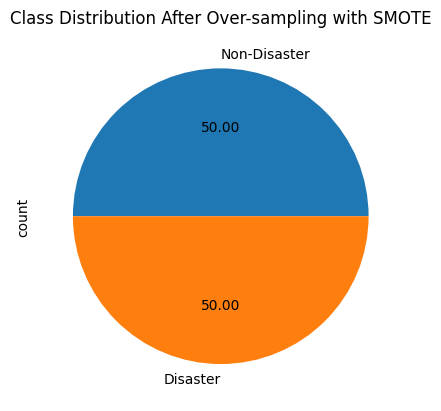

target
1    9256
0    9256
Name: count, dtype: int64


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('tweetsv1.csv')
df['processed_text'] = df['processed_text'].fillna('')

# Step 1: Convert text data to numerical data using TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['processed_text'])  # Using 'processed_text' column
y = df['target']

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Step 3: Visualize the new class distribution after SMOTE
ax = y_resampled.value_counts().plot.pie(autopct='%.2f', labels=['Non-Disaster', 'Disaster'])
_ = ax.set_title("Class Distribution After Over-sampling with SMOTE")
plt.show()

# Output class distribution
print(y_resampled.value_counts())


In [17]:
# Step 4: Convert the resampled data back to a DataFrame for saving
# The resampled TF-IDF data is in sparse matrix format, so we'll need to convert it into a dense format.
df_resampled = pd.DataFrame(X_resampled.todense(), columns=tfidf.get_feature_names_out())  # Convert to DataFrame
df_resampled['target'] = y_resampled  # Add the resampled target column back to the DataFrame

# Step 5: Save the balanced dataset to a new CSV file
df_resampled.to_csv('tweetsv2.csv', index=False)

print("Balanced dataset created and saved to 'balanced_disaster_data.csv'")

Balanced dataset created and saved to 'balanced_disaster_data.csv'
